# Freshflow task <<

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [122]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, mean_absolute_percentage_error as mape
from sklearn.model_selection import TimeSeriesSplit

In [192]:
import tensorflow as tf
from dataclasses import dataclass

In [2]:
data_path = './data'
fn = 'data.csv'

In [6]:
df = pd.read_csv(os.path.join(data_path, fn))

In [9]:
df.head()

,Unnamed: 0,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
0,0,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
1,1,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
2,2,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47
3,3,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47
4,4,2022-02-09,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.64,0.99,0.0,13.0,12.84


In [10]:
df.shape

(1878, 9)

In [17]:
df[df.columns[0]].describe()

count    1878.000000
mean      938.500000
std       542.276221
min         0.000000
25%       469.250000
50%       938.500000
75%      1407.750000
max      1877.000000
Name: Unnamed: 0, dtype: float64

In [19]:
df = df[df.columns[1:]]

### Check data integrity

In [32]:
df.describe()

,item_number,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
count,1.878000e+03,1878.000000,1878.000000,1878.000000,1878.000000,926.000000
mean,8.014925e+07,1.216796,1.941402,8.602769,8.235357,21.207775
std,1.227237e+05,0.568129,0.936656,14.981958,11.510945,13.069028
min,8.002835e+07,0.520000,0.660000,0.000000,0.000000,1.490000
25%,8.002835e+07,0.674928,1.055314,0.000000,0.000000,12.847500
50%,8.010192e+07,0.978451,1.546338,0.000000,0.000000,19.220000
75%,8.031748e+07,1.991321,3.216415,18.000000,15.000000,27.430000
max,8.031748e+07,2.150000,3.490000,144.000000,85.000000,93.520000


In [12]:
df.isna().apply(sum, axis=0)

Unnamed: 0                  0
day                         0
item_number                 0
item_name                   0
purchase_price              0
suggested_retail_price      0
orders_quantity             0
sales_quantity              0
revenue                   952
dtype: int64

The only column with missiing values is 'revenue'.

In [20]:
df.head()

,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
0,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
1,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
2,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47
3,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47
4,2022-02-09,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.64,0.99,0.0,13.0,12.84


In [31]:
df.loc[df.revenue.isna()]['item_name'].value_counts().sort_index() / df['item_name'].value_counts().sort_index()

ROMA TOMATEN ES I 500G SF         0.463259
SL MANDARINEN BEH.ES I 750G GS    0.824281
UH ZWIEBELN DE-HE I 1KG GS        0.233227
Name: item_name, dtype: float64

A great proportion of missing values for 'revenue' for all existing products.

In [58]:
df.item_number.unique()

array([80317483, 80101923, 80028349])

In [44]:
corr = df.corr(numeric_only=True)
corr

,item_number,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
item_number,1.000000,-0.053747,-0.060507,-0.180531,-0.294701,-0.310880
purchase_price,-0.053747,1.000000,0.998510,-0.412418,-0.527654,-0.100891
suggested_retail_price,-0.060507,0.998510,1.000000,-0.414879,-0.531429,-0.084194
orders_quantity,-0.180531,-0.412418,-0.414879,1.000000,0.665446,0.333663
sales_quantity,-0.294701,-0.527654,-0.531429,0.665446,1.000000,0.781035
revenue,-0.310880,-0.100891,-0.084194,0.333663,0.781035,1.000000


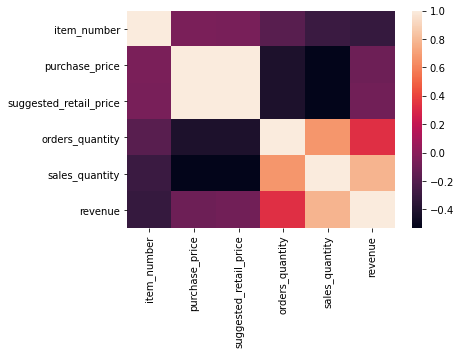

In [45]:
import seaborn as sns
sns.heatmap(corr)
plt.show()

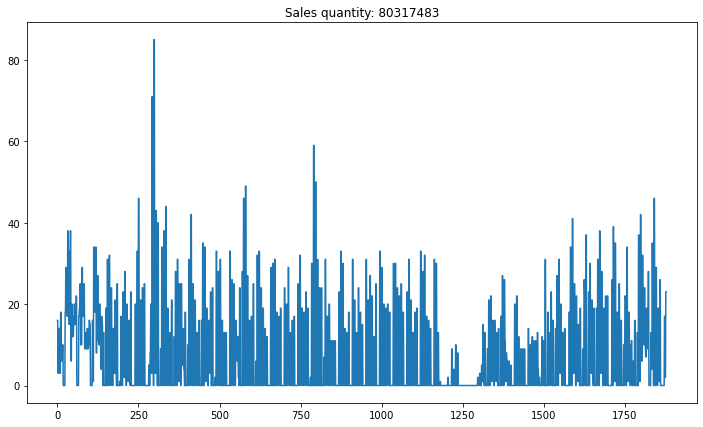

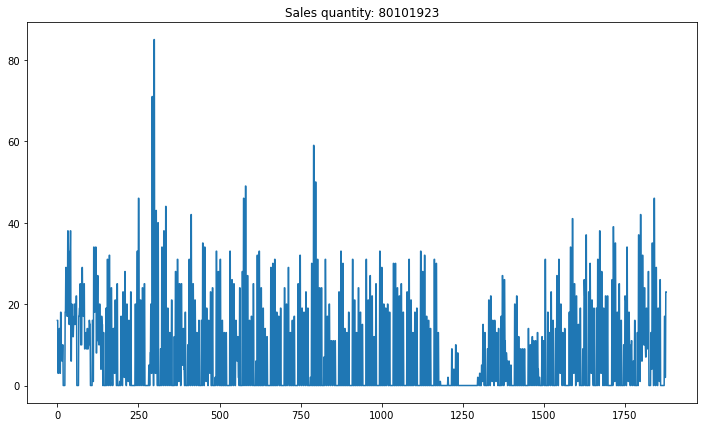

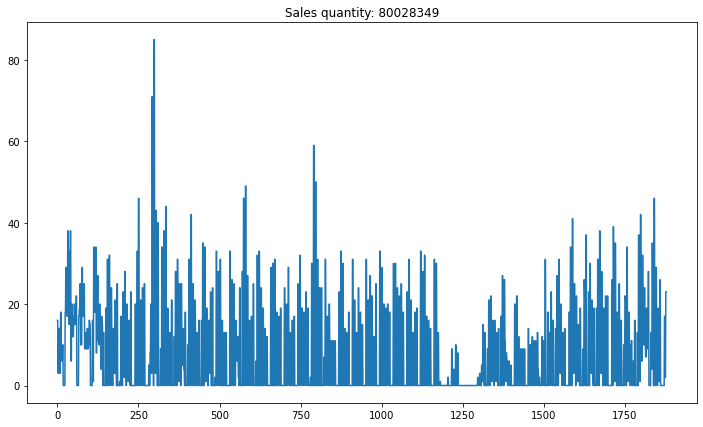

In [69]:
items = df.item_number.unique()
for item in items:
    plt.title(f'Sales quantity: {item}')
    df.sales_quantity.plot(figsize=(12,7))
    plt.show()

count    626.000000
mean       5.690096
std        6.800692
min        0.000000
25%        0.000000
50%        2.000000
75%       10.000000
max       33.000000
Name: sales_quantity, dtype: float64


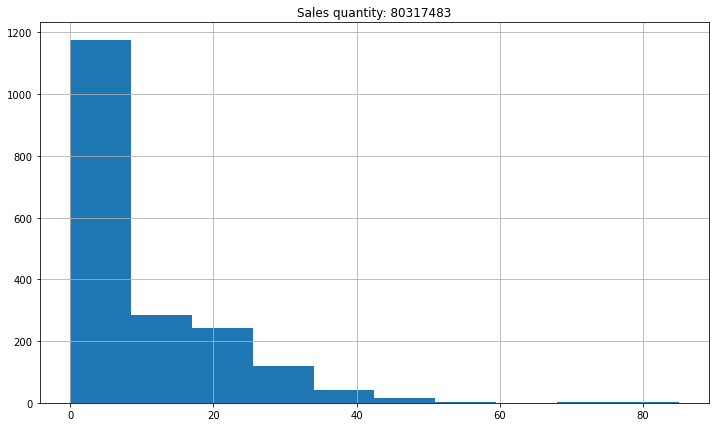

count    626.000000
mean       1.271565
std        4.464228
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       38.000000
Name: sales_quantity, dtype: float64


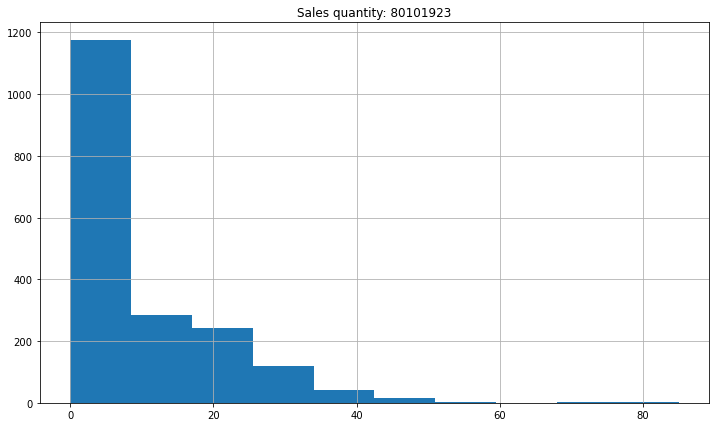

count    626.000000
mean      17.744409
std       13.642704
min        0.000000
25%        4.000000
50%       18.000000
75%       27.000000
max       85.000000
Name: sales_quantity, dtype: float64


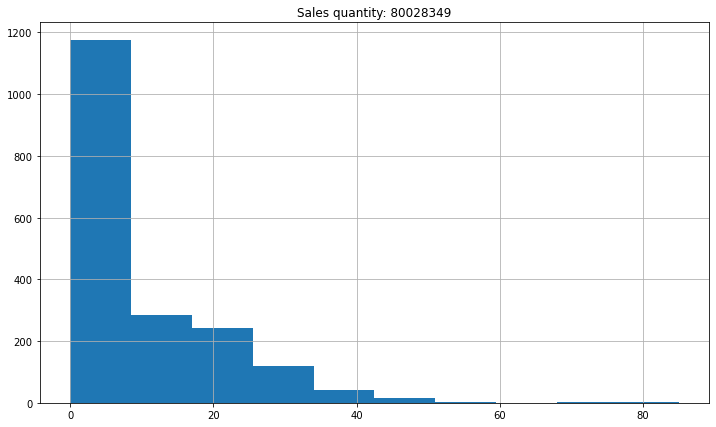

In [83]:
items = df.item_number.unique()
for item in items:
    print(df.loc[df.item_number==item, 'sales_quantity'].describe())
    plt.title(f'Sales quantity: {item}')
    df.sales_quantity.hist(figsize=(12,7))
    plt.show()

In [89]:
df['date'] = pd.to_datetime(df.day)

In [92]:
dfd = df.set_index('date')

In [95]:
dfd = dfd[['item_number', 'item_name', 'purchase_price',
       'suggested_retail_price', 'orders_quantity', 'sales_quantity', 'revenue']]

In [107]:
dfd

,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
date,,,,,,,
2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.920000,1.490000,0.0,16.0,23.55
2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.920000,1.490000,0.0,16.0,23.55
2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.050000,3.490000,0.0,3.0,10.47
2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.050000,3.490000,0.0,3.0,10.47
2022-02-09,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.640000,0.990000,0.0,13.0,12.84
...,...,...,...,...,...,...,...
2021-04-03,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,40.0,17.0,25.33
2021-04-03,80101923,SL MANDARINEN BEH.ES I 750G GS,1.991321,3.216415,0.0,2.0,5.98
2021-04-03,80101923,SL MANDARINEN BEH.ES I 750G GS,1.991321,3.216415,0.0,2.0,5.98


In [108]:
df_item = {}
for item in items:
    df_item[item] = dfd.loc[dfd.item_number==item].resample('W').mean(numeric_only=True).drop('item_number', axis=1)

In [109]:
df_item.keys()

dict_keys([80317483, 80101923, 80028349])

In [110]:
df_item[80317483]

,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
date,,,,,
2021-04-04,0.978451,1.546338,20.000000,8.500000,25.330000
2021-04-11,0.986700,1.506097,7.142857,10.142857,21.068000
2021-04-18,0.988350,1.498048,12.857143,10.714286,18.586667
2021-04-25,0.988350,1.498048,8.571429,9.714286,16.840000
2021-05-02,0.978451,1.546338,11.428571,7.571429,26.240000
2021-05-09,0.978451,1.546338,10.000000,7.285714,12.651667
2021-05-16,0.978451,1.546338,12.857143,10.142857,21.110000
2021-05-23,0.978451,1.546338,22.857143,10.000000,17.311667
2021-05-30,0.978451,1.546338,4.285714,7.285714,15.172000


### Weekly figures

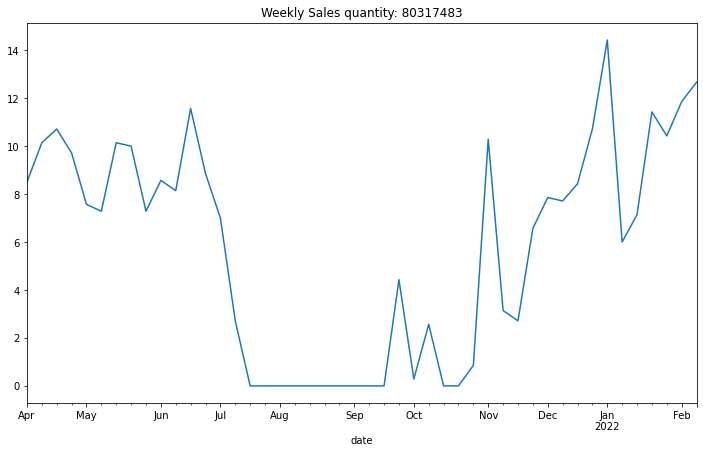

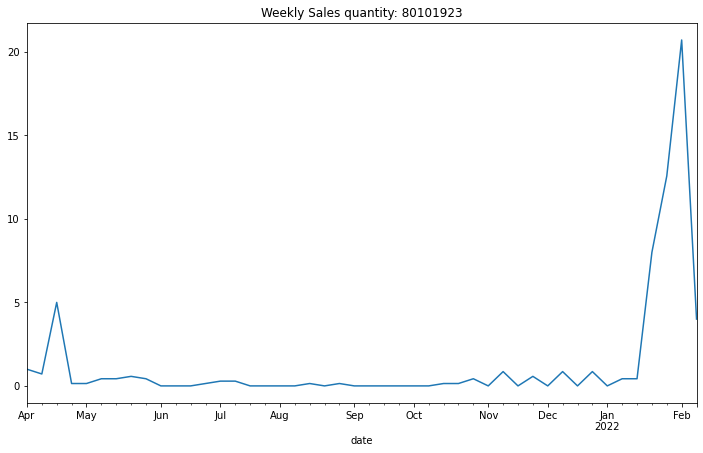

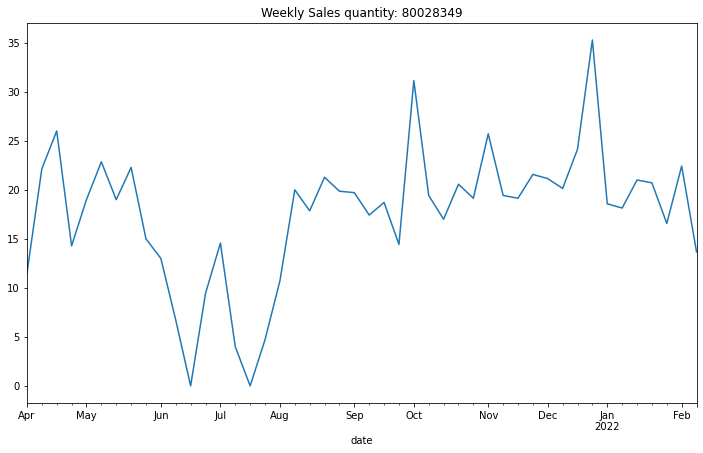

In [111]:
for item in df_item.keys():
    plt.title(f'Weekly Sales quantity: {item}')
    df_item[item].sales_quantity.plot(figsize=(12,7))
    plt.show()

### Item = 80028349

In [112]:
ITEM_NR = 80028349

In [113]:
dfi = df_item[ITEM_NR]

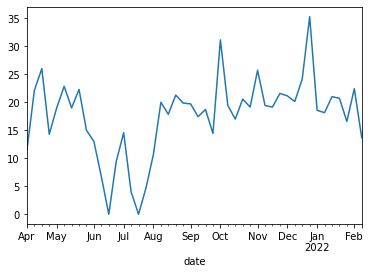

In [117]:
dfi.sales_quantity.plot()
plt.show()

### Naive forecasting method

In [126]:
preds, history, results = forecast_ma(dfi.sales_quantity)
print(results)

{'mse': 44.09706475182666, 'mae': 5.231216931216931, 'mape': 1072285625564403.9}


### Moving Averages

In [135]:
res = {}
for w in range(2, 11):
    _, _, results = forecast_ma(dfi.sales_quantity, window_size=w)
    res[w] = results['mae']

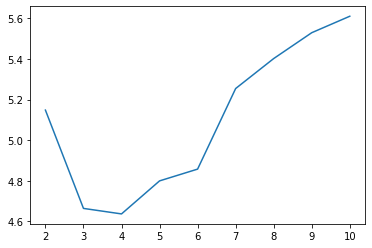

In [132]:
pd.Series(res).plot()
plt.show()

In [137]:
best_ma = 4 # best window size

In [138]:
_, _, results = forecast_ma(dfi.sales_quantity, window_size=best_ma)
print(results)

{'mse': 37.76900189639347, 'mae': 4.636763038548752, 'mape': 2278606954324358.0}


We can take this model as our baseline

In [140]:
from statsmodels.tsa.seasonal import seasonal_decompose as sdecomp

In [150]:
sales_decomp = sdecomp(dfi.sales_quantity.values, period=4, model='additive')

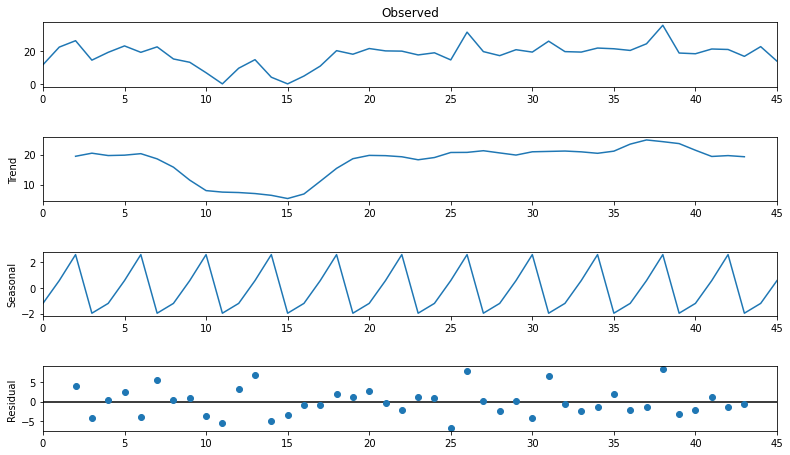

In [151]:
fig = sales_decomp.plot()
fig.set_figheight(7)
fig.set_figwidth(12)
plt.show()

There is no trend but a cycle show up in the middle corresponding to low sales in the middle of June and July. There seems to be a small but inimportant seasonal component. Let's check residuals after differencing.

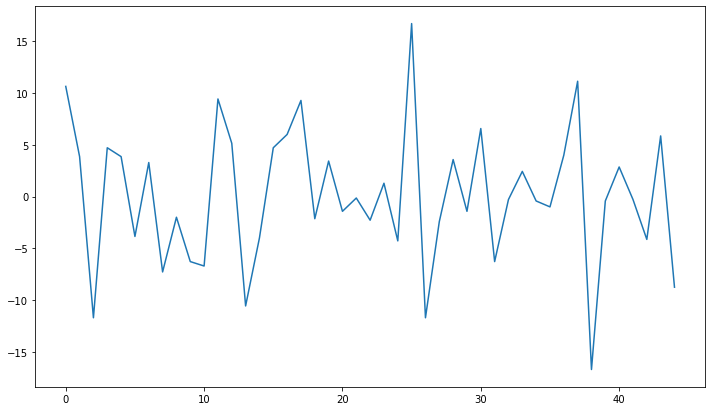

In [154]:
sr = dfi.sales_quantity.values
sr_diff = sr[1:] - sr[:-1]

plt.figure(figsize=(12,7))
plt.plot(sr_diff)
plt.show()

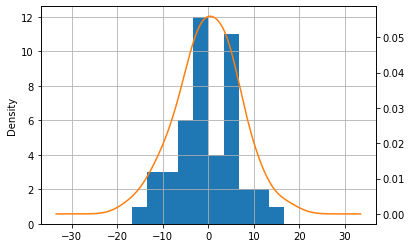

In [158]:
s = pd.Series(sr_diff)
s.describe()
s.hist()
s.plot(kind='kde', secondary_y=True)
plt.show()

Residuals look Ok.

A final check to autocorrelations

In [163]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # acf and pacf plots

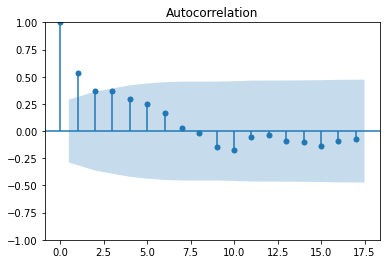

In [165]:
_ = plot_acf(sr)
plt.show()

Let's try an ARIMA model

In [159]:
from statsmodels.tsa.arima.model import ARIMA

In [160]:
trn_size = int(sr.shape[0] * 0.66)
tst_size = sr.shape[0] - trn_size
print(trn_size, tst_size)

30 16


In [162]:
Xtrn, Xtst = sr[:trn_size], sr[trn_size:]

Walking forward evaluation of an ARIMA model

In [181]:
ARIMA_PARAMS = (1, 0, 0) # AR of grade 1, no differencing, no MA

In [182]:
preds, history, results = eval_arima(Xtrn, Xtst, ARIMA_PARAMS) # let's predict at least one year

0.........10.....

In [183]:
print(results)

{'mse': 32.483322646997784, 'mae': 4.249843750514736, 'mape': 0.19564515337385396}


Just a little better than our baseline.

In [184]:
ARIMA_PARAMS = (1, 0, 4) # AR of grade 1, no differencing, MA = 4

In [185]:
preds, history, results = eval_arima(Xtrn, Xtst, ARIMA_PARAMS) # let's predict at least one year

0.

/home/guye/anaconda3_202105/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/guye/anaconda3_202105/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


........10.....

In [186]:
print(results)

{'mse': 31.60438233888403, 'mae': 4.121335583728992, 'mape': 0.18931570708727408}


### Let's try a ML model on the daily data set

In [188]:
sr = df.sales_quantity

In [189]:
trn_size = int(sr.shape[0] * 0.66)
tst_size = sr.shape[0] - trn_size
print(trn_size, tst_size)

1239 639


In [190]:
Xtrn, Xtst = sr[:trn_size], sr[trn_size:]

In [194]:
# Save all "global" variables here
@dataclass
class G:
    WINDOW_SIZE = 64
    BATCH_SIZE = 256
    SHUFFLE_BUFFER_SIZE = 512

In [197]:
train_set = windowed_dataset(Xtrn, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [200]:
model = create_lstm_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 64, 16)            64        
                                                                 
 bidirectional_2 (Bidirectio  (None, 64, 64)           12544     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 38,497
Trainable params: 38,497
Non-trai

In [203]:
# Train it
history = model.fit(train_set, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 99ms/step - loss: 2.7408 - mae: 3.1178
Epoch 2/100
5/5 [==============================] - 1s 96ms/step - loss: 2.6921 - mae: 3.0614
Epoch 3/100
5/5 [==============================] - 1s 92ms/step - loss: 2.6437 - mae: 3.0082
Epoch 4/100
5/5 [==============================] - 1s 92ms/step - loss: 2.5802 - mae: 2.9416
Epoch 5/100
5/5 [==============================] - 1s 94ms/step - loss: 2.5970 - mae: 2.9680
Epoch 6/100
5/5 [==============================] - 1s 96ms/step - loss: 2.6002 - mae: 2.9670
Epoch 7/100
5/5 [==============================] - 1s 98ms/step - loss: 2.5191 - mae: 2.8874
Epoch 8/100
5/5 [==============================] - 1s 99ms/step - loss: 2.5059 - mae: 2.8753
Epoch 9/100
5/5 [==============================] - 1s 92ms/step - loss: 2.4780 - mae: 2.8435
Epoch 10/100
5/5 [==============================] - 1s 94ms/step - loss: 2.4371 - mae: 2.8004
Epoch 11/100
5/5 [==============================] - 1s 150ms/step - l

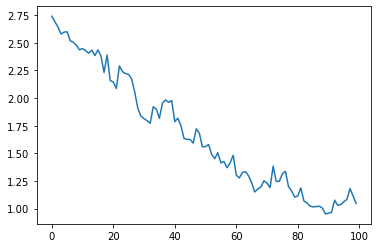

In [204]:
plt.plot(history.history['loss'])

The learning rate seems to be too big for most epochs but I do not have time to tune that. Probably I should change the optimizer altogether. Anyways, let's check how we're doing in the validation set.

In [205]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [206]:
forecast_valid = model_forecast(model, sr[trn_size-G.WINDOW_SIZE:-1], G.WINDOW_SIZE).squeeze()

20/20 [==============================] - 1s 11ms/step


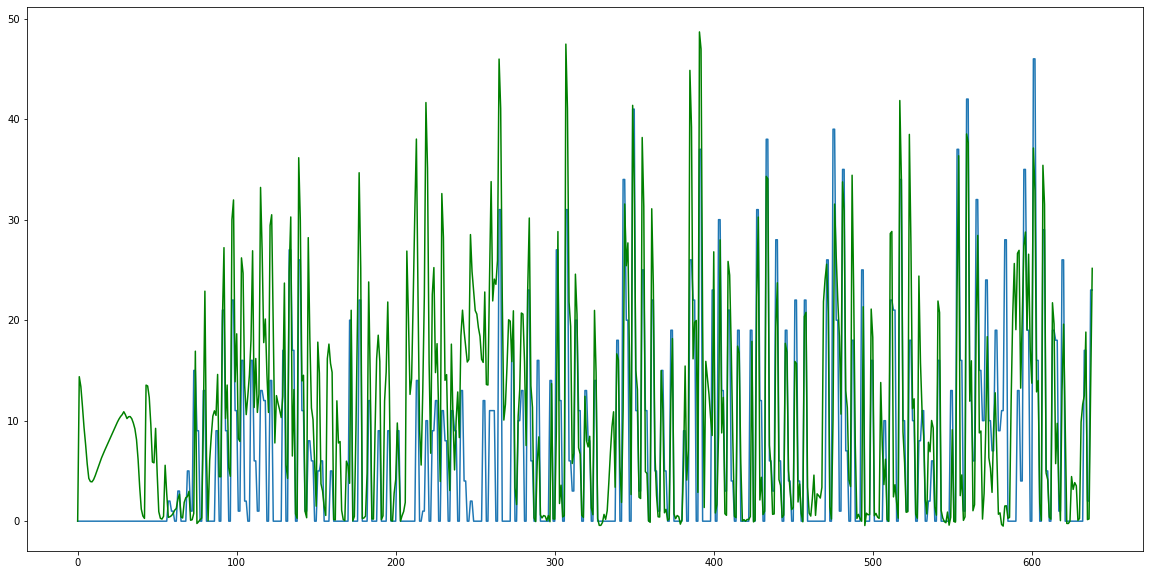

In [211]:
plt.figure(figsize=(20,10))
plt.plot(Xtst.values)
plt.plot(forecast_valid, color='g')
plt.show()

In [214]:
mse = tf.keras.metrics.mean_squared_error(Xtst.values, forecast_valid).numpy()
mae = tf.keras.metrics.mean_absolute_error(Xtst.values, forecast_valid).numpy()
mape = tf.keras.metrics.mean_absolute_percentage_error(Xtst.values, forecast_valid).numpy()

In [215]:
print(mse, mae, mape)

82.44628 6.4359603 2874534000.0


Definitely worse than our baseline. But this is a daily model. May be with more weekly data and with some tuning the model could be improved.

### Functions

In [120]:
def forecast_ma(sr, window_size=1, fn=np.mean):
    ''' moving average forecasting
    '''
    
    metrics = {'mse': mse, 'mae': mae, 'mape': mape}
    
    sr_agg = sr.rolling(window_size).apply(fn)
    preds = sr_agg.shift(1)[window_size:]
    history = sr[window_size:]
    
    results = {metric_name: metric(history, preds) for metric_name, metric in metrics.items()} 
    
    return preds, history, results

In [168]:
def eval_arima(Xtrn, Xtst, arima_params=(1, 0, 0), verbose=False):
    '''
    '''
    metrics = {'mse': mse, 'mae': mae, 'mape': mape}
    
    history = Xtrn.copy()
    preds = np.array([])
    for k in range(Xtst.shape[0]):
        char = k if k%10 == 0 else '.'
        print(char, end='')
        model = ARIMA(history, order=arima_params)
        model_fit = model.fit()
        if verbose:
            print(f'Using model ARIMA({model.k_ar},{model.k_diff},{model.k_ma}). ', end='')
        y_hat = model_fit.forecast()[0]
        obs = Xtst[k]
        history = np.append(history, obs)
        preds = np.append(preds, y_hat)
        if verbose:
            print(f'predicted={round(y_hat, 2)}, expected={round(obs, 2)}.')
    
    results = {metric_name: metric(Xtst, preds) for metric_name, metric in metrics.items()} 
    return preds, history, results 

In [196]:
def windowed_dataset(series, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    ds = ds.batch(batch_size).prefetch(1)
    return ds

In [198]:
def create_lstm_model():
    ''' lstm model used in min temperatures ts
    '''
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(16, 3, strides=1, padding='causal',
                               input_shape=[G.WINDOW_SIZE, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1)
    ]) 

    LEARNING_RATE = 1.1e-3
    #optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=0.9)
    optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    
    model.compile(loss=tf.keras.losses.huber,
                  optimizer=optimizer,
                  metrics=["mae"])  

    return model